In [1]:
from cell_env import CellEnv
import matplotlib.pyplot as plt
import numpy as np

from plot_utils import plot_observations, evaluate_model, plot_actions
import os
WANDB_DIR = os.getenv("WANDB_DIR", ".")

In [18]:
# Example usage:
env_args = {
    "max_timesteps": 30000,
    "alpha_mem": 0.7,
    "dt": 0.01,
    "frame_stack": 40,
}

model_str = f"{WANDB_DIR}/sweep-models/silver-sweep-360/best_model.zip"

eval_env = CellEnv(**env_args)

all_obs, all_actions, all_fractions = evaluate_model(env_args, 1, model_str, multiprocess=True)


In [3]:
on_obs, on_actions, on_fractions = evaluate_model(env_args, 2, 'on', multiprocess=True)
off_obs, off_actions, off_fractions = evaluate_model(env_args, 2, 'off', multiprocess=True)

KeyboardInterrupt: 

In [23]:
from cell_model_pop_fde_slow_sde import Cell_Population


mod = Cell_Population(T_final=300, alpha_mem=0.7, delta_t=0.1, sigma=0)
n_cycles = 120
h = 2**-5
b_max = 1
b_min = 0

# a = Qa[ind]
# b = Qb[ind]
a = 0.4
b = 0.5

mod.initialize(h=h)
delta_t = mod.time_treat(Qa=0, Qb=b)
t, tot, sus, res = mod.simulate_population(b_max, delta_t)
b_opt = np.ones(len(t))*b_max

for n in range(n_cycles):
    delta_t = mod.time_pause(Qa=a, Qb=b)
    t2, tot2, sus2, res2 = mod.simulate_population(b_min, delta_t)
    b_opt = np.concatenate((b_opt,np.zeros(len(t2)-len(t))))

    delta_t = mod.time_treat(Qa=a, Qb=b)
    t, tot, sus, res = mod.simulate_population(b_max, delta_t)
    b_opt = np.concatenate((b_opt,np.ones(len(t)-len(t2))*b_max))


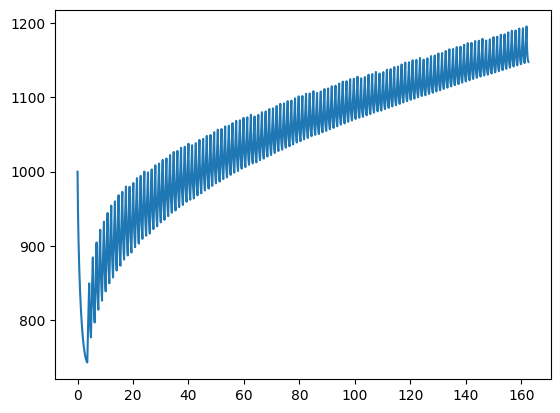

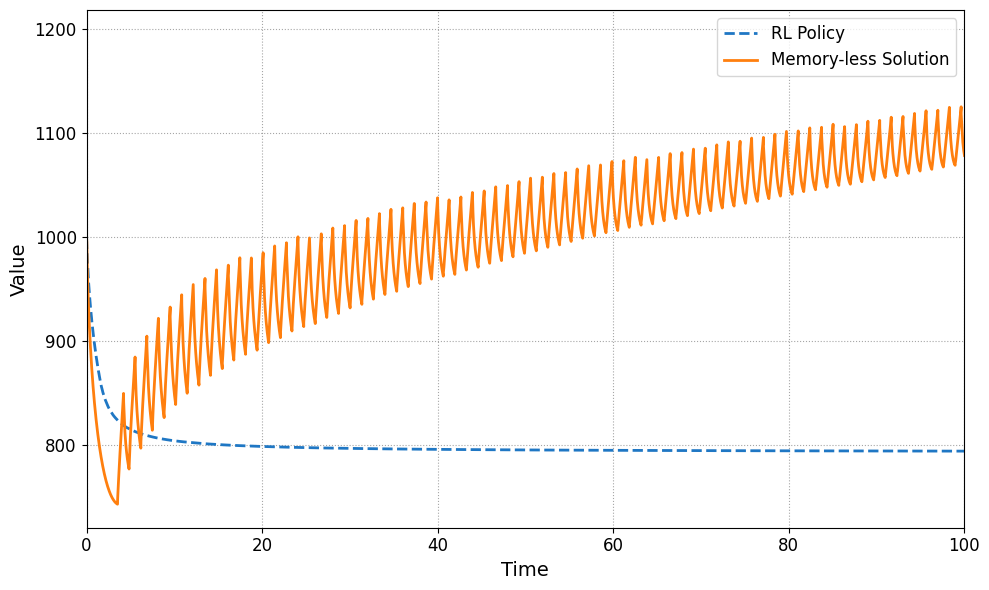

In [32]:
times = np.arange(0, 300, 0.01)[1:]

plt.figure(figsize=(10, 6))

# Plot RL Policy
plt.plot(times, all_obs.mean(axis=0), label='RL Policy', color='#17becf', linestyle='--', linewidth=2)

# Plot Memory-less Solution
plt.plot(t, tot, label='Memory-less Solution', color='#e377c2', linestyle='-', linewidth=2)

# Styling
plt.xlim(0, 100)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle=':', color='gray', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Optional: Add a title
# plt.title('Comparison of RL Policy and Memory-less Solution', fontsize=16)

plt.tight_layout()


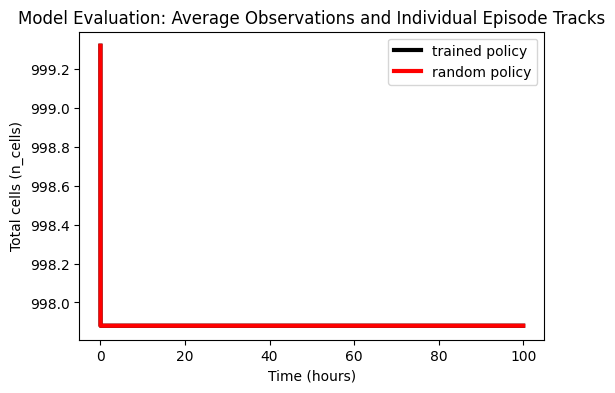

In [ ]:
plot_observations(env_args, all_obs, on_obs, alpha_val=0.25)

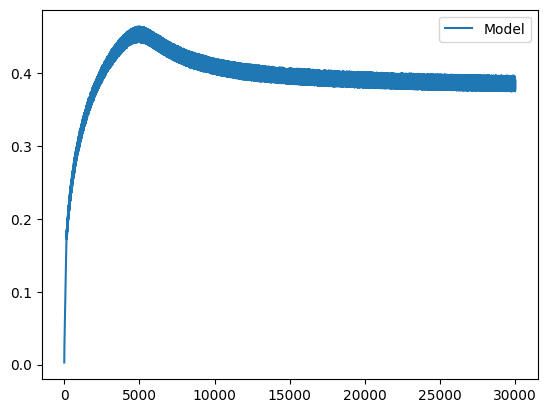

In [20]:
plt.plot(all_fractions.mean(axis=0), label="Model")
# plt.plot(unif_fractions.mean(axis=0), label="Uniform")
plt.legend()
# plt.xscale('log')

(8700.0, 9000.0)

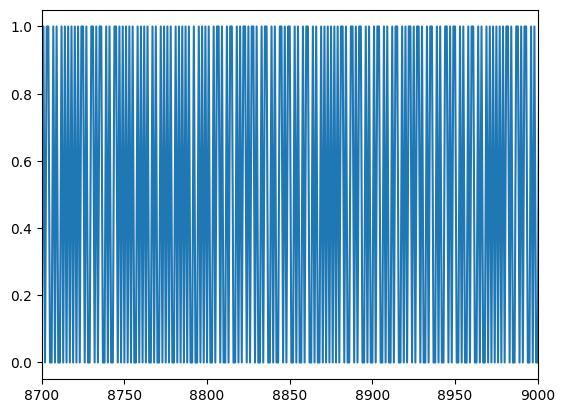

In [11]:
plt.plot(all_actions.mean(axis=0))
plt.xlim(8700,9000)

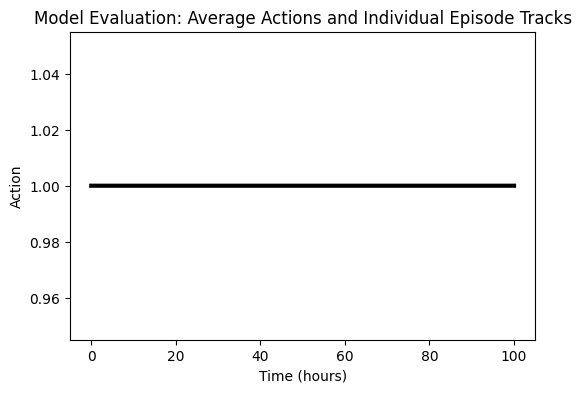

In [ ]:
plot_actions(env_args, all_actions)

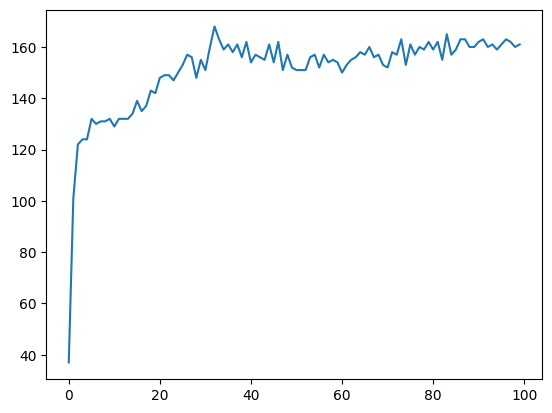

In [21]:
# bin the actions and plot average frequency in each bin over time:
avg_actions = np.array(all_actions).mean(axis=0)
freqs=[]
time_chunks = 100
for i in range(time_chunks):
    interval = len(avg_actions)//time_chunks
    action_subset = avg_actions[interval*i:interval*(i+1)]
    # number of zeros:
    switches = len(action_subset[action_subset == 0])
    freqs.append(switches)
plt.plot(freqs)
